# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

#Import the OpenWeatherMap API key
from api_keys import weather_api_key

#Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
#Empty list for holding the latitude and longitude combinations
lat_lngs = []

#Empty list for holding the cities names
cities = []

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

#Define an empty list to fetch the weather data for each city
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units=imperial&q={city}'
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Add 1 to the record count
    record_count += 1

    #Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.ctime(city_weather['dt'])

        #Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whangarei
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | crane
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | maksatikha
Processing Record 9 of Set 1 | crixas
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | concordia
Processing Record 12 of Set 1 | eydhafushi
Processing Record 13 of Set 1 | sao bento do sul
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | keflavik
Processing Record 21 of Set 1 | altay
Processing Record 22 of Set 1 | kavaratti


In [4]:
#Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
#Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whangarei,-35.7317,174.3239,52.68,97,100,18.88,NZ,Sat Oct 28 21:37:44 2023
1,georgetown,5.4112,100.3354,83.95,85,20,5.75,MY,Sat Oct 28 21:41:29 2023
2,thompson,55.7435,-97.8558,14.16,92,40,2.30,CA,Sat Oct 28 21:41:30 2023
3,crane,31.3974,-102.3501,71.94,63,7,20.89,US,Sat Oct 28 21:41:31 2023
4,blackmans bay,-43.0167,147.3167,62.73,48,100,1.99,AU,Sat Oct 28 21:41:32 2023


In [6]:
#Export the City_Data into a csv
city_data_df.to_csv('Resources/cities.csv', index_label='City_ID')

In [7]:
#Read saved data
city_data_df = pd.read_csv('Resources/cities.csv', index_col='City_ID')

#Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whangarei,-35.7317,174.3239,52.68,97,100,18.88,NZ,Sat Oct 28 21:37:44 2023
1,georgetown,5.4112,100.3354,83.95,85,20,5.75,MY,Sat Oct 28 21:41:29 2023
2,thompson,55.7435,-97.8558,14.16,92,40,2.30,CA,Sat Oct 28 21:41:30 2023
3,crane,31.3974,-102.3501,71.94,63,7,20.89,US,Sat Oct 28 21:41:31 2023
4,blackmans bay,-43.0167,147.3167,62.73,48,100,1.99,AU,Sat Oct 28 21:41:32 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

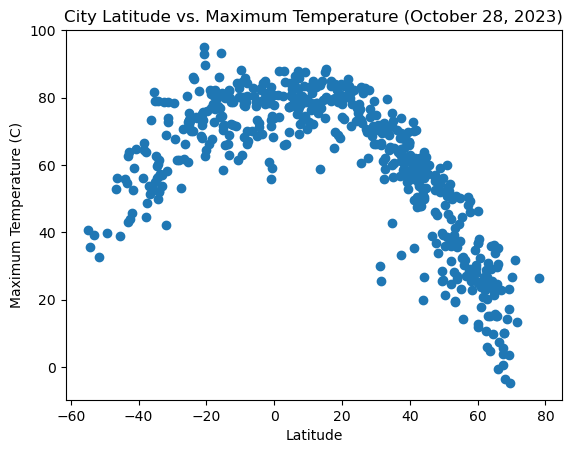

In [8]:
#Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

#Incorporate the other graph properties
plt.title('City Latitude vs. Maximum Temperature (October 28, 2023)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)')

#Save the figure
plt.savefig('Resources/Fig1.png')

#Show plot
plt.show()

#### Latitude Vs. Humidity

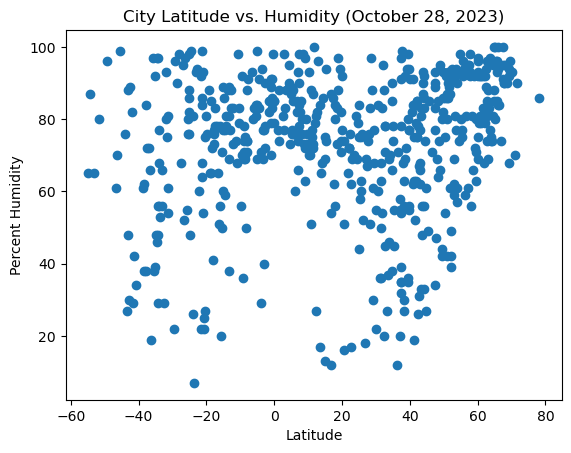

In [9]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

#Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (October 28, 2023)')
plt.xlabel('Latitude')
plt.ylabel('Percent Humidity')

#Save the figure
plt.savefig('Resources/Fig2.png')

#Show plot
plt.show()

#### Latitude Vs. Cloudiness

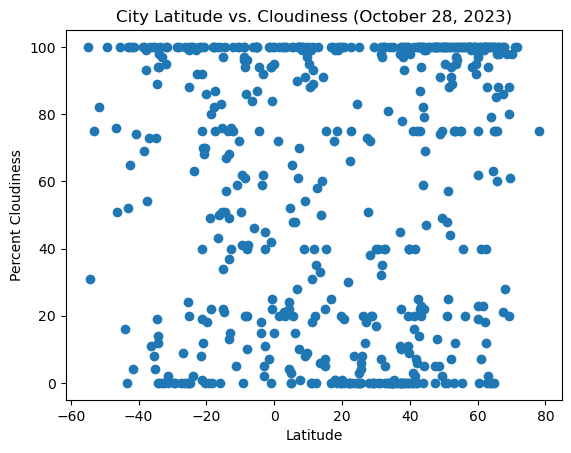

In [10]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

#Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (October 28, 2023)')
plt.xlabel('Latitude')
plt.ylabel('Percent Cloudiness')

#Save the figure
plt.savefig('Resources/Fig3.png')

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

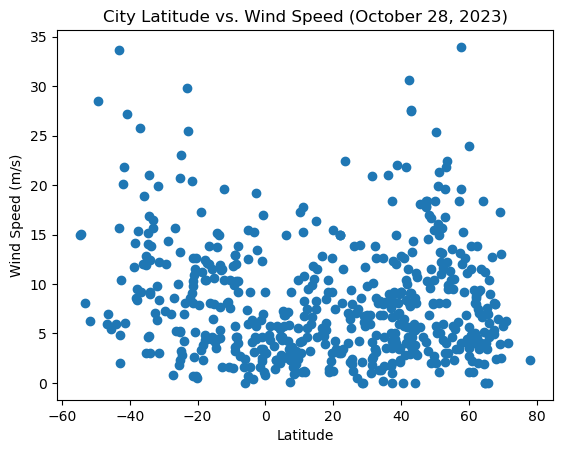

In [11]:
#Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

#Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (October 28, 2023)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

#Save the figure
plt.savefig('Resources/Fig4.png')

#Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
#Define a function to create Linear Regression plots
def correlation_regression(x_axis, y_axis, eq_loc):
    correlation = st.pearsonr(x_axis, y_axis)
    print(f'The r-value is: {round(correlation[0], 2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regression_line = x_axis * slope + intercept
    line_equation = f'y ={slope: .2f}x +{intercept: .2f}'
    plt.plot(x_axis, regression_line, 'r-')
    plt.annotate(line_equation, eq_loc, fontsize=12, color='red')
    plt.scatter(x_axis, y_axis)


In [15]:
#Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

#Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,georgetown,5.4112,100.3354,83.95,85,20,5.75,MY,Sat Oct 28 21:41:29 2023
2,thompson,55.7435,-97.8558,14.16,92,40,2.30,CA,Sat Oct 28 21:41:30 2023
3,crane,31.3974,-102.3501,71.94,63,7,20.89,US,Sat Oct 28 21:41:31 2023
5,badger,64.8000,-147.5333,22.35,88,0,0.00,US,Sat Oct 28 21:41:33 2023
7,maksatikha,57.7970,35.8825,29.14,98,100,4.07,RU,Sat Oct 28 21:41:35 2023


In [16]:
#Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

#Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whangarei,-35.7317,174.3239,52.68,97,100,18.88,NZ,Sat Oct 28 21:37:44 2023
4,blackmans bay,-43.0167,147.3167,62.73,48,100,1.99,AU,Sat Oct 28 21:41:32 2023
6,port-aux-francais,-49.3500,70.2167,39.81,96,100,28.54,TF,Sat Oct 28 21:41:34 2023
8,crixas,-14.5489,-49.9692,79.83,59,51,3.56,BR,Sat Oct 28 21:41:37 2023
9,punta arenas,-53.1500,-70.9167,39.31,65,75,8.05,CL,Sat Oct 28 21:41:38 2023


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.89


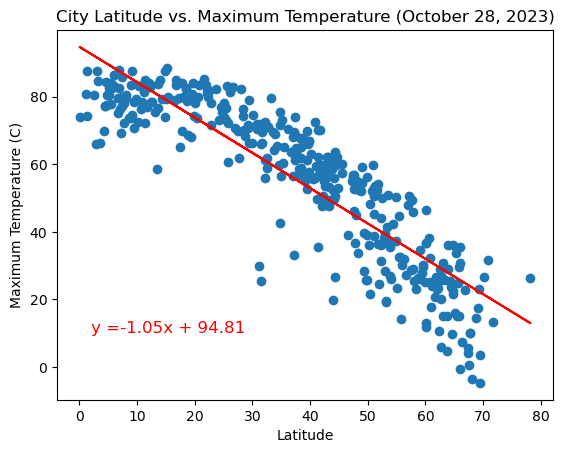

In [31]:
#Linear regression on Northern Hemisphere
correlation_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (2, 10))
plt.title('City Latitude vs. Maximum Temperature (October 28, 2023)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)');

The r-value is: 0.67


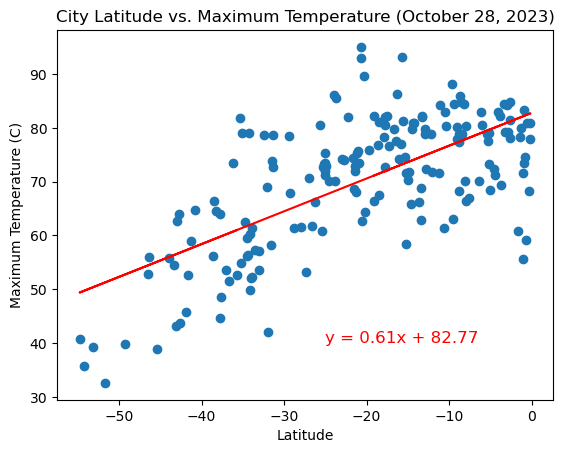

In [32]:
#Linear regression on Southern Hemisphere
correlation_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-25, 40))
plt.title('City Latitude vs. Maximum Temperature (October 28, 2023)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)');

**Discussion about the linear relationship:** In the northern hemisphere, there is a strong negative correlation between latitude and the maximum temperature observed, and in the southern hemimsphere, there is a positive correlation between latitude and the maximum temperature observed. This makes sense because in the northern hemisphere moving towards more southern latitudes is equivalent to moving towards the equator (latitude 0), and in the southern hemisphere moving towards more northern latitudes is equivalent to moving towards the equator (latitude 0).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15


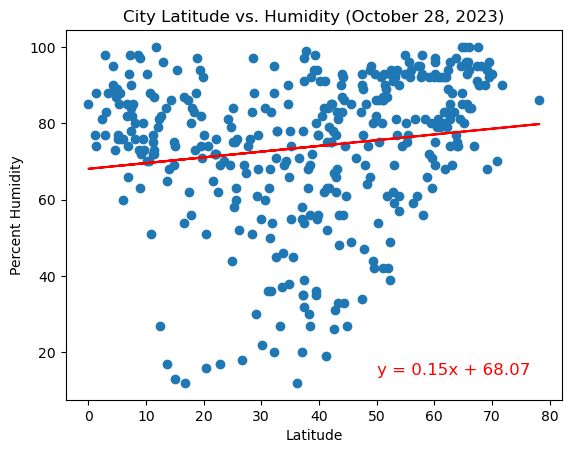

In [37]:
#Northern Hemisphere
correlation_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (50, 14))
plt.title('City Latitude vs. Humidity (October 28, 2023)')
plt.xlabel('Latitude')
plt.ylabel('Percent Humidity');

The r-value is: 0.24


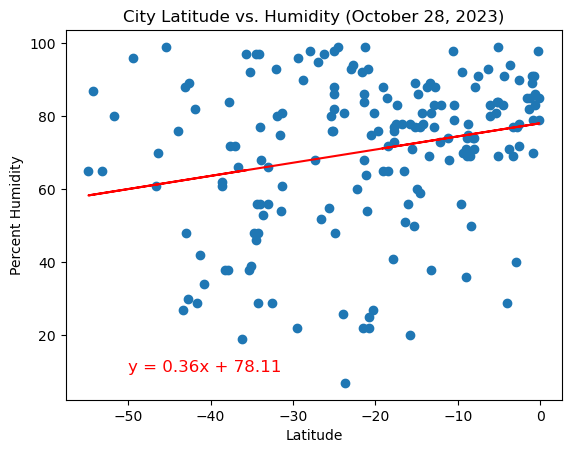

In [46]:
#Southern Hemisphere
correlation_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-50, 10))
plt.title('City Latitude vs. Humidity (October 28, 2023)')
plt.xlabel('Latitude')
plt.ylabel('Percent Humidity');

**Discussion about the linear relationship:** In both the northern and southern hemisphere, there is a weak positive correlation between latitude and humidity, but I expected to see a similar relationship to maximum temperature because warm air can hold more moisture.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23


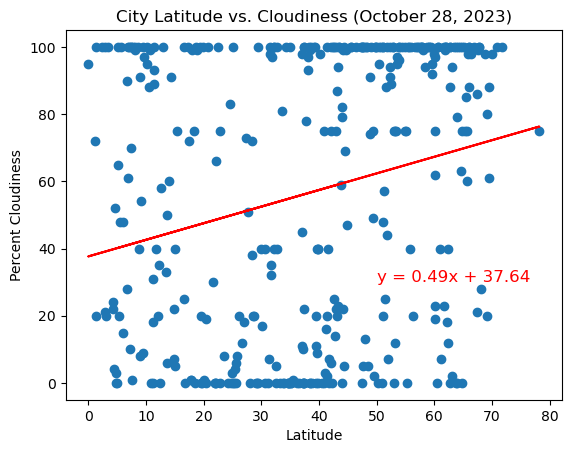

In [48]:
#Northern Hemisphere
correlation_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (50, 30))
plt.title('City Latitude vs. Cloudiness (October 28, 2023)')
plt.xlabel('Latitude')
plt.ylabel('Percent Cloudiness');

The r-value is: -0.02


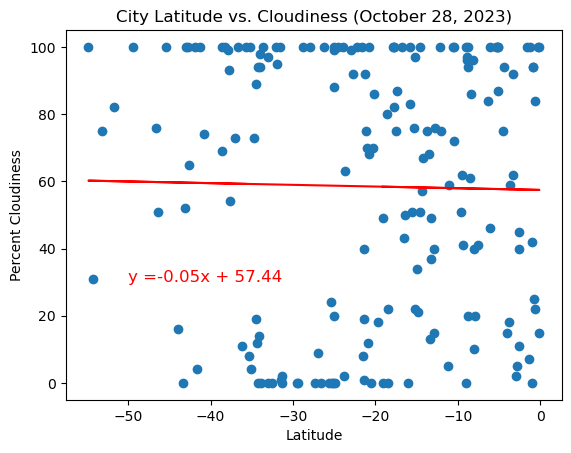

In [51]:
#Southern Hemisphere
correlation_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-50, 30))
plt.title('City Latitude vs. Cloudiness (October 28, 2023)')
plt.xlabel('Latitude')
plt.ylabel('Percent Cloudiness');

**Discussion about the linear relationship:** There appears to be virtually no correlation between latitude and cloudiness in either hemisphere. This makes sense because cloudiness is determined by weather and not by climate.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.18


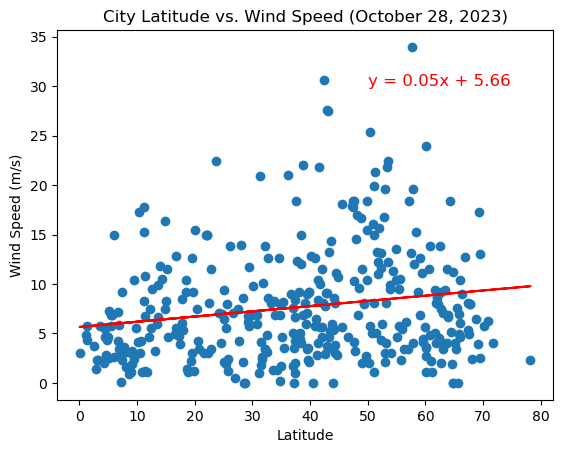

In [53]:
#Northern Hemisphere
correlation_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (50, 30))
plt.title('City Latitude vs. Wind Speed (October 28, 2023)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)');

The r-value is: -0.33


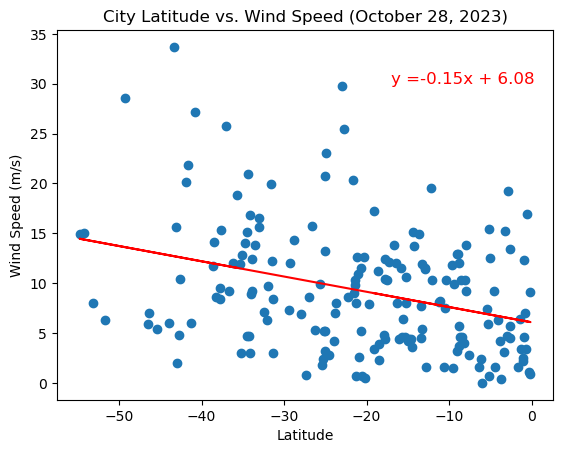

In [58]:
#Southern Hemisphere
correlation_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-17, 30))
plt.title('City Latitude vs. Wind Speed (October 28, 2023)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)');

**Discussion about the linear relationship:** There is a slight positive correlation in the northern hemisphere between latitude and wind speed, and a negative correlation in the southern hemisphere between latitude and wind speed. Much like cloudiness, wind speed is determined locally by geography, for example, and not globally.